# 2D Fuzzy Clustering

Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path

path = str(Path.cwd().parent)
sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap

from datatype.dataset import Dataset
from datatype.spectrogram import flatten
from fcmeans import FCM
from IPython.display import Audio, display
from ipywidgets import (
    HBox, 
    HTML, 
    Image, 
    interactive, 
    Layout, 
    Output, 
    VBox
)
from plotly import graph_objs as go
from textwrap import dedent

In [3]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [4]:
X = np.concatenate((
    [dataframe.umap_x_2d],
    [dataframe.umap_y_2d]
))

X = X.transpose()

X.shape

(14000, 2)

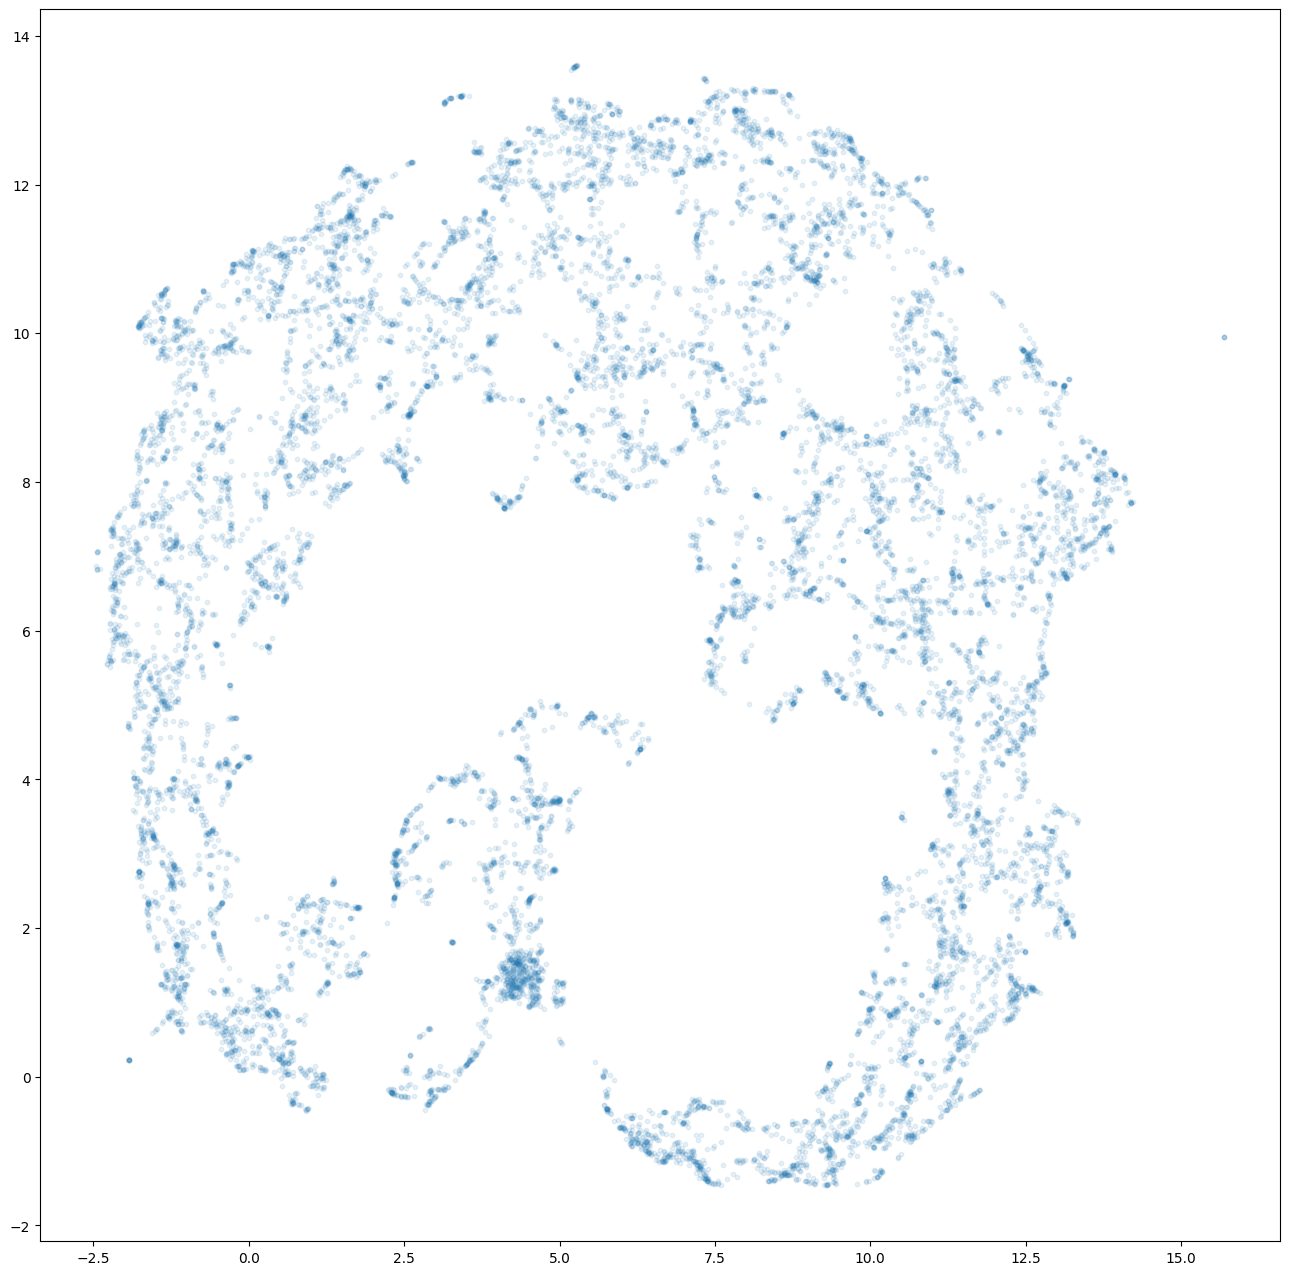

In [5]:
figsize = (16, 16)
plt.figure(figsize=figsize)

plt.scatter(
    X[:, 0], 
    X[:, 1],
    s=10,
    alpha=0.10
)

plt.show()

In [6]:
# amount = np.arange(start=1, stop=21, step=1)
# models = []

# for n_clusters in amount:
#     fcm = FCM(n_clusters=n_clusters)
#     fcm.fit(X)
#     models.append(fcm)

In [7]:
# # Find the highest partition coefficient (PC) and the lowest partition entropy coefficient (PEC)

# num_clusters = len(amount)

# rows = int(np.ceil(np.sqrt(num_clusters)))
# cols = int(np.ceil(num_clusters / rows))

# fig, axes = plt.subplots(
#     rows, 
#     cols, 
#     figsize=(16, 24)
# )

# for n_clusters, model, axe in zip(amount, models, axes.ravel()):
#     pc = model.partition_coefficient
#     pec = model.partition_entropy_coefficient
    
#     fcm_centers = model.centers
#     fcm_labels = model.predict(X)
    
#     axe.scatter(
#         X[:, 0], 
#         X[:, 1],
#         c=fcm_labels, 
#         alpha=0.1
#     )
    
#     axe.scatter(
#         fcm_centers[:, 0], 
#         fcm_centers[:, 1],
#         marker='+', 
#         c='black'
#     )
    
#     title = dedent(
#         f"""
#         n_clusters = {n_clusters} \n 
#         PC = {pc:.3f} \n 
#         PEC = {pec:.3f}
#         """
#     )
    
#     axe.set_title(title)
    
# fig.tight_layout(pad=5.0)
# plt.show()

In [8]:
fcm = FCM(n_clusters=4)
fcm.fit(X)

In [9]:
centers = fcm.centers
labels = fcm.predict(X)

In [10]:
dataframe['fcm_label_2d'] = labels

In [11]:
dataset.save(dataframe)

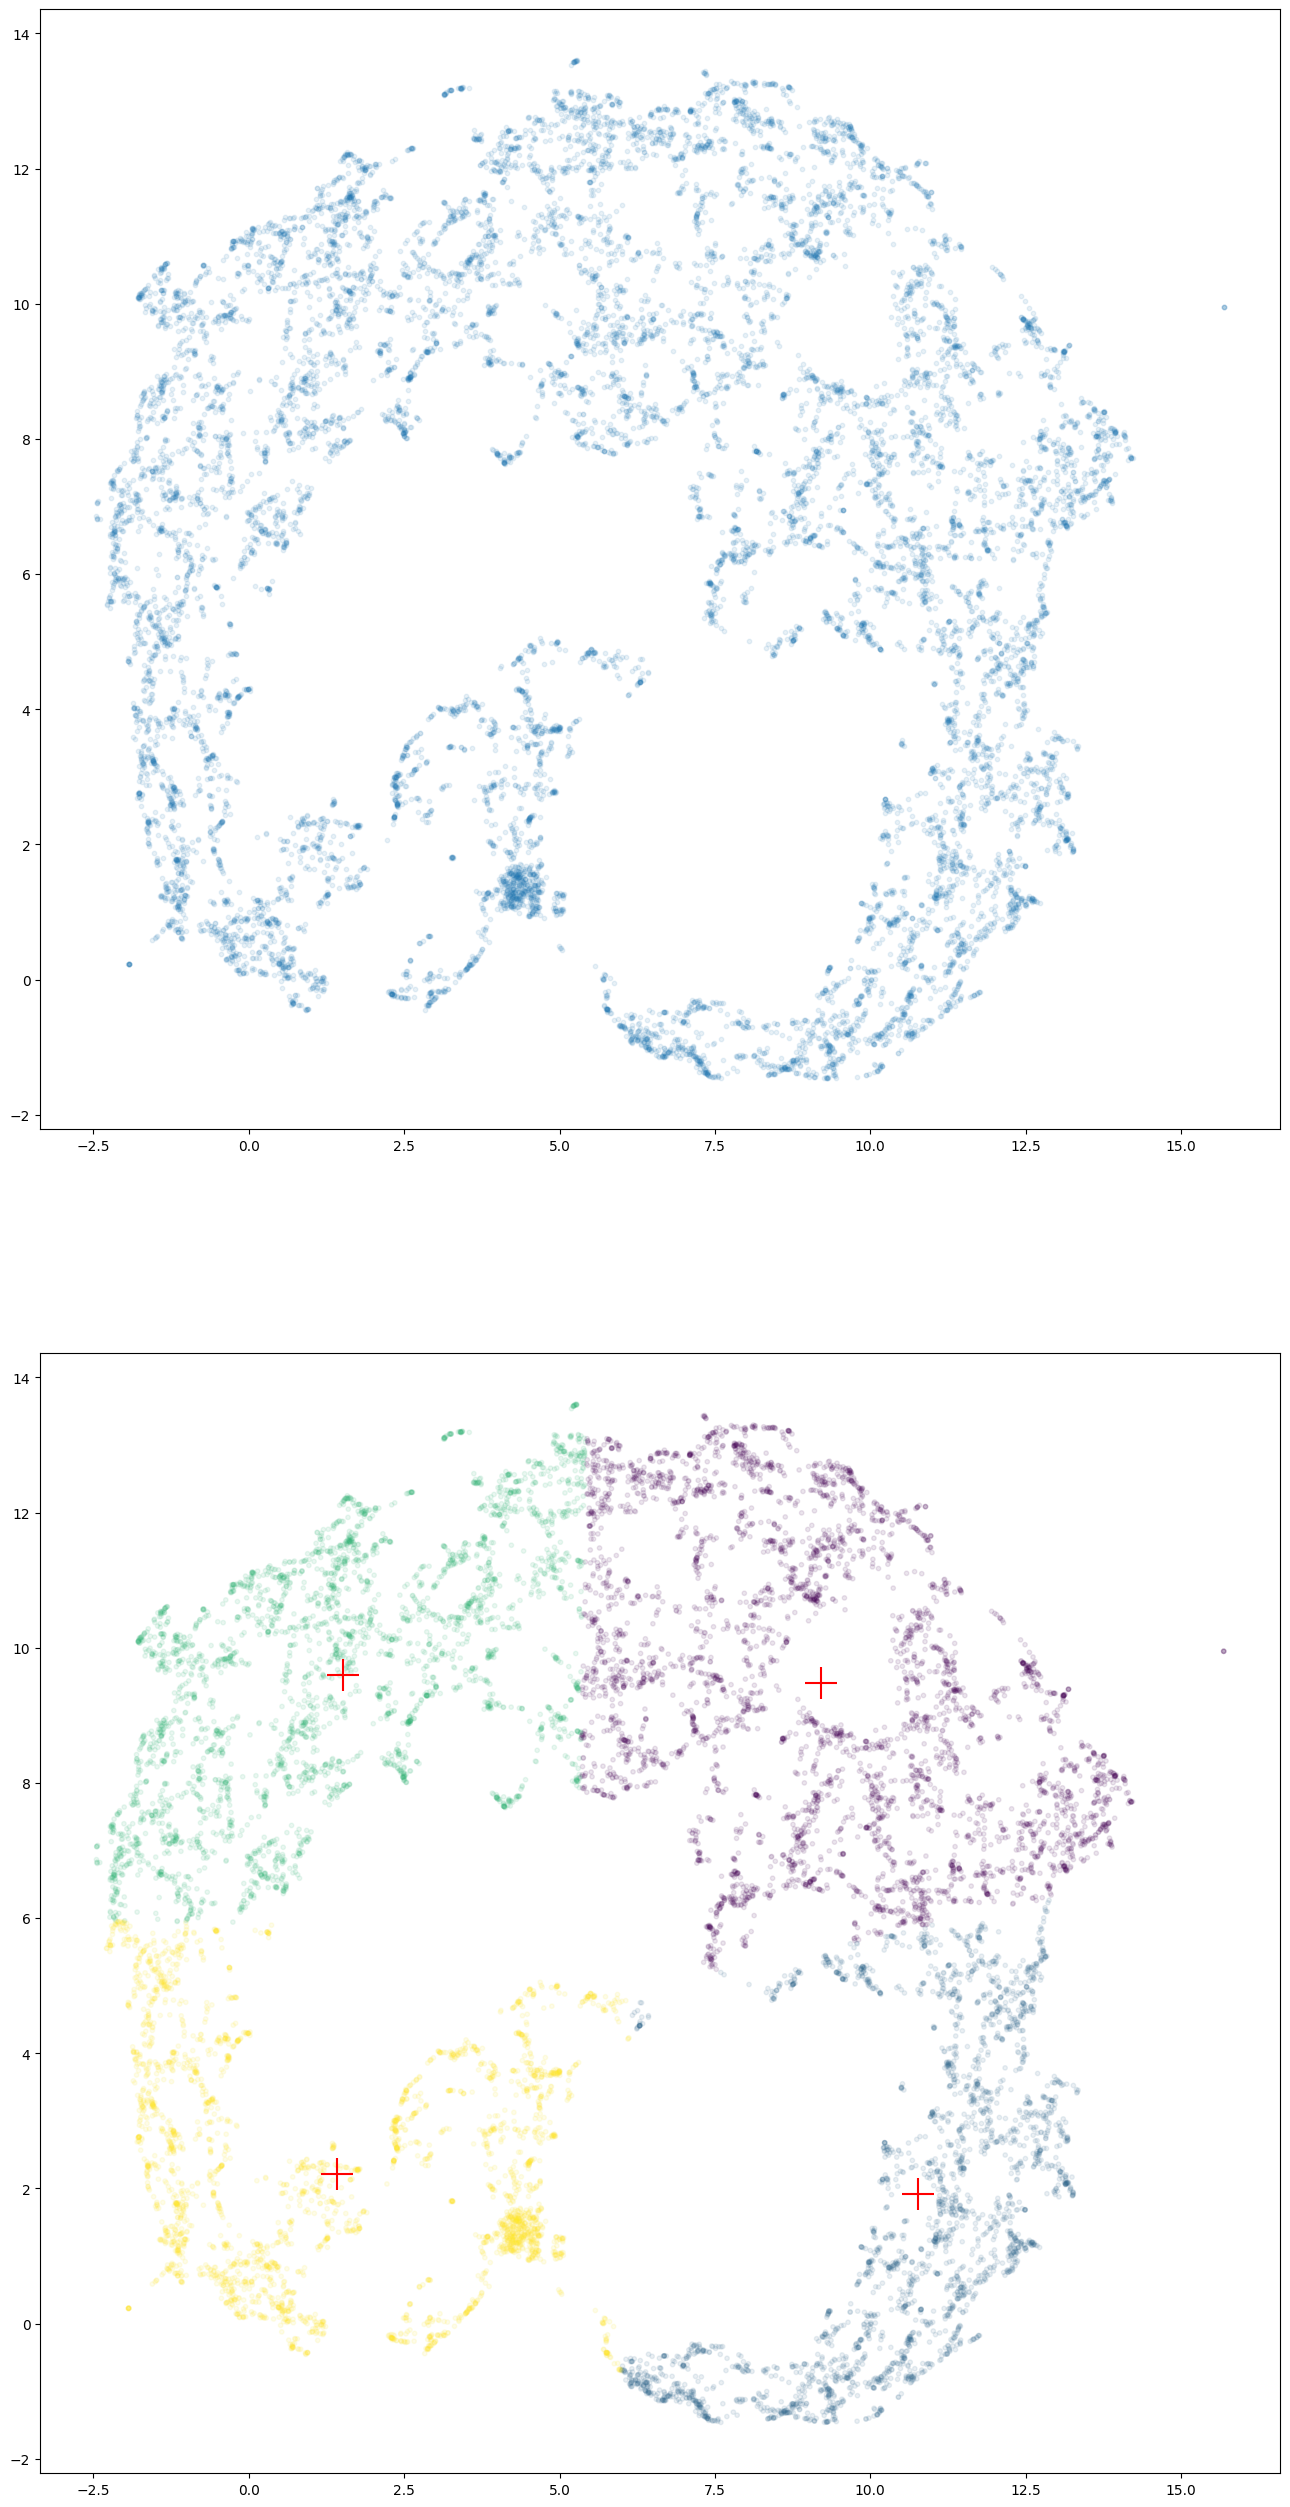

In [12]:
fig, ax = plt.subplots(
    2, 
    1, 
    figsize=(16, 32)
)

ax[0].scatter(
    X[:, 0], 
    X[:, 1],
    s=10,
    alpha=0.10
)

ax[1].scatter(
    X[:, 0], 
    X[:, 1], 
    c=labels,
    s=10,
    alpha=0.10
)

ax[1].scatter(
    centers[:, 0], 
    centers[:, 1], 
    marker='+', 
    s=500, 
    c='red'
)

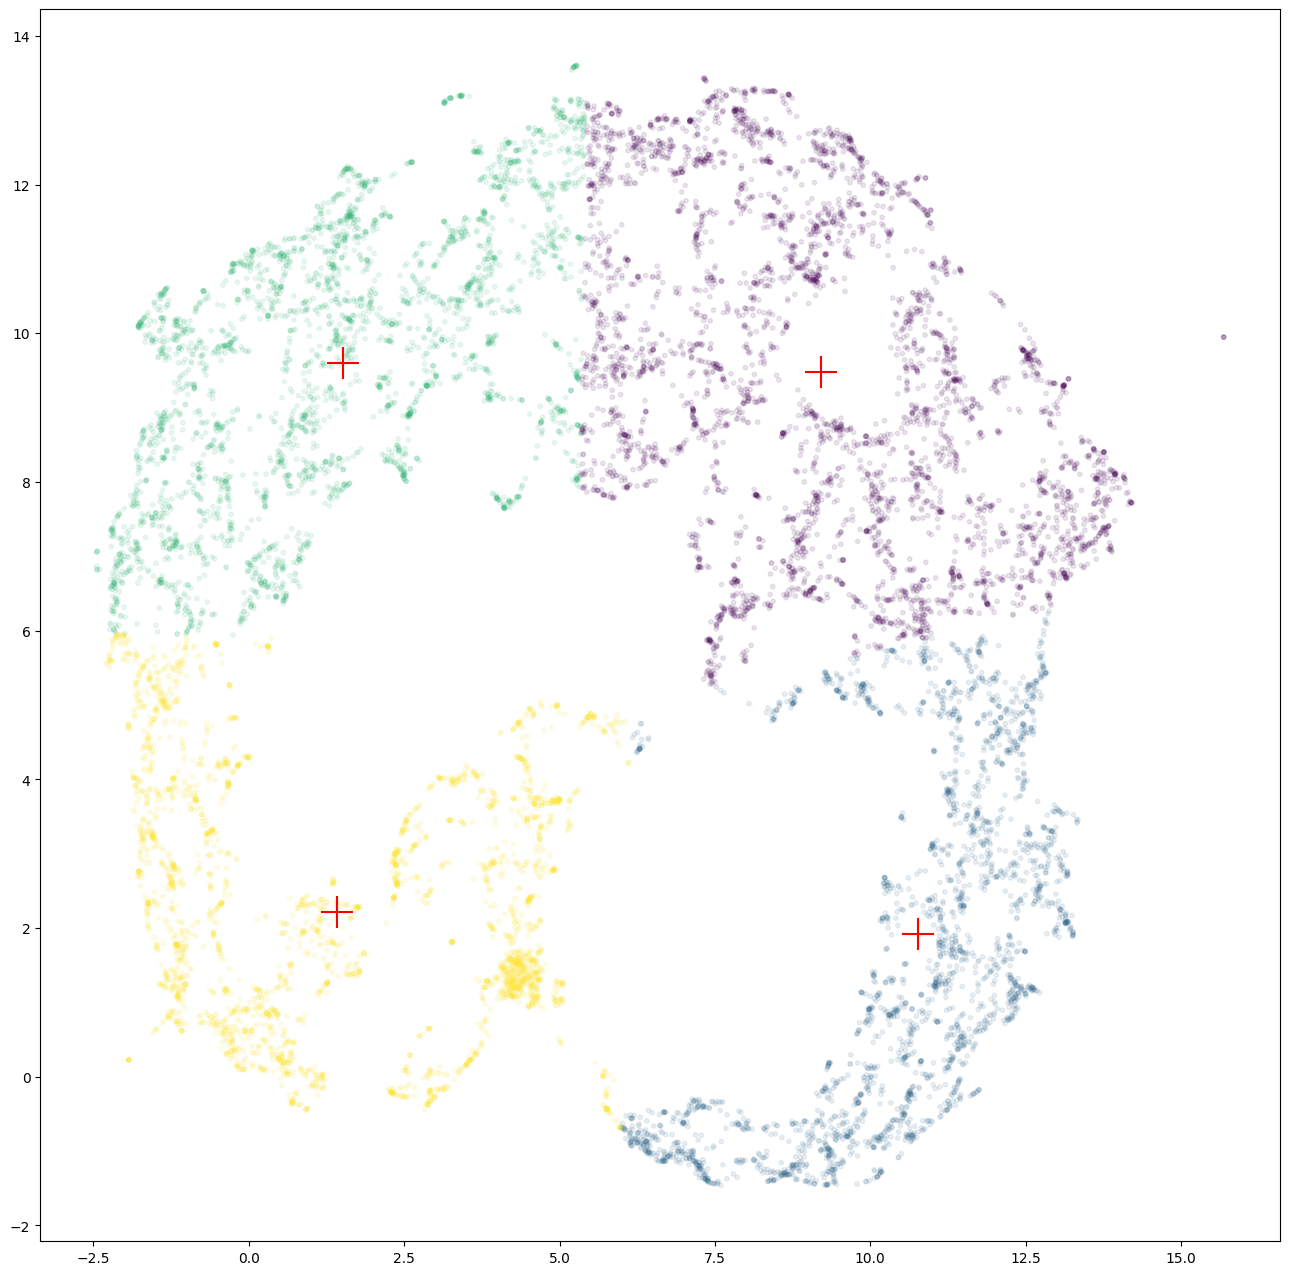

In [13]:
fig, ax = plt.subplots(
    figsize=(16, 16)
)

ax.scatter(
    X[:, 0], 
    X[:, 1], 
    c=labels, 
    s=10,
    alpha=0.10
)

ax.scatter(
    centers[:, 0], 
    centers[:, 1], 
    marker='+', 
    s=500, 
    c='red'
)